<a href="https://colab.research.google.com/github/petron23/ML_random_projects/blob/main/Classifications.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Binary classification

In [1]:
import torch
from sklearn.datasets import make_circles
from torch import nn

coordinates/features: [0.83619806 0.03563148] class: 1


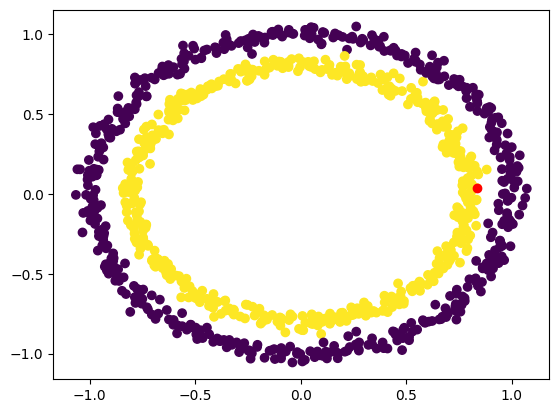

In [14]:
device = "cuda" if torch.cuda.is_available() else "cpu"
n_samples = 1000
X, y = make_circles(n_samples,
                    noise=0.03, 
                    random_state=1) 

import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0], 
            y=X[:, 1], 
            c=y);
plt.scatter(x=X[0, 0], 
            y=X[0, 1], 
            c="Red");

print(r"coordinates/features:", X[0], "class:", y[0])


In [15]:
#turn the data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, # 20% test, 80% train
                                                    random_state=1)

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [24]:
from torch import nn
class ClassifyCircles(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1) 
        self.relu = nn.ReLU()

    def forward(self, x):
       return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model = ClassifyCircles().to(device)
print(model)

ClassifyCircles(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


In [25]:
#optimizer and loss
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

#accuracy function
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100 
    return acc

In [26]:
torch.manual_seed(42)
epochs = 1000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    y_logits = model(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))     
    loss = loss_fn(y_logits, y_train) 
    acc = accuracy_fn(y_true=y_train, 
                      y_pred=y_pred)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    ### Validation
    model.eval()
    with torch.inference_mode():
      test_logits = model(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits))
      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(y_true=y_test,
                             y_pred=test_pred)

    #Results
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69303, Accuracy: 49.62% | Test Loss: 0.69279, Test Accuracy: 51.50%
Epoch: 100 | Loss: 0.69069, Accuracy: 52.75% | Test Loss: 0.69180, Test Accuracy: 48.50%
Epoch: 200 | Loss: 0.68875, Accuracy: 53.50% | Test Loss: 0.69065, Test Accuracy: 51.00%
Epoch: 300 | Loss: 0.68606, Accuracy: 54.00% | Test Loss: 0.68880, Test Accuracy: 52.00%
Epoch: 400 | Loss: 0.68201, Accuracy: 54.37% | Test Loss: 0.68570, Test Accuracy: 52.50%
Epoch: 500 | Loss: 0.67637, Accuracy: 54.12% | Test Loss: 0.68067, Test Accuracy: 53.50%
Epoch: 600 | Loss: 0.66764, Accuracy: 54.75% | Test Loss: 0.67173, Test Accuracy: 54.50%
Epoch: 700 | Loss: 0.65523, Accuracy: 58.13% | Test Loss: 0.65867, Test Accuracy: 60.50%
Epoch: 800 | Loss: 0.63480, Accuracy: 68.00% | Test Loss: 0.63850, Test Accuracy: 70.50%
Epoch: 900 | Loss: 0.59356, Accuracy: 79.25% | Test Loss: 0.59783, Test Accuracy: 78.50%


In [30]:
#improved model1
import torch
import torch.nn as nn
import torch.optim as optim

class ClassifyCircles_2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=64)
        self.layer_2 = nn.Linear(in_features=64, out_features=64)
        self.layer_3 = nn.Linear(in_features=64, out_features=1)
        self.activation = nn.LeakyReLU()
        self.dropout = nn.Dropout(0.5)
        self.batch_norm_1 = nn.BatchNorm1d(64)
        self.batch_norm_2 = nn.BatchNorm1d(64)
        self.initialize_weights()

    def forward(self, x):
        x = self.layer_1(x)
        x = self.batch_norm_1(x)
        x = self.activation(x)
        x = self.dropout(x)
        x = self.layer_2(x)
        x = self.batch_norm_2(x)
        x = self.activation(x)
        x = self.dropout(x)
        x = self.layer_3(x)
        return x

    def initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.xavier_uniform_(m.weight)
                nn.init.zeros_(m.bias)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ClassifyCircles_2().to(device)

# Define the optimizer and learning rate
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Define the loss function
loss_fn = nn.BCEWithLogitsLoss()

print(model)


ClassifyCircles_2(
  (layer_1): Linear(in_features=2, out_features=64, bias=True)
  (layer_2): Linear(in_features=64, out_features=64, bias=True)
  (layer_3): Linear(in_features=64, out_features=1, bias=True)
  (activation): LeakyReLU(negative_slope=0.01)
  (dropout): Dropout(p=0.5, inplace=False)
  (batch_norm_1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch_norm_2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


In [31]:
torch.manual_seed(42)
epochs = 1000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    y_logits = model(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))     
    loss = loss_fn(y_logits, y_train) 
    acc = accuracy_fn(y_true=y_train, 
                      y_pred=y_pred)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    ### Validation
    model.eval()
    with torch.inference_mode():
      test_logits = model(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits))
      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(y_true=y_test,
                             y_pred=test_pred)

    #Results
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.82342, Accuracy: 51.12% | Test Loss: 0.68699, Test Accuracy: 63.00%
Epoch: 100 | Loss: 0.43233, Accuracy: 99.50% | Test Loss: 0.42372, Test Accuracy: 100.00%
Epoch: 200 | Loss: 0.04457, Accuracy: 99.88% | Test Loss: 0.03959, Test Accuracy: 100.00%
Epoch: 300 | Loss: 0.01366, Accuracy: 100.00% | Test Loss: 0.01170, Test Accuracy: 100.00%
Epoch: 400 | Loss: 0.00718, Accuracy: 100.00% | Test Loss: 0.00628, Test Accuracy: 100.00%
Epoch: 500 | Loss: 0.00456, Accuracy: 100.00% | Test Loss: 0.00410, Test Accuracy: 100.00%
Epoch: 600 | Loss: 0.00316, Accuracy: 100.00% | Test Loss: 0.00305, Test Accuracy: 100.00%
Epoch: 700 | Loss: 0.00236, Accuracy: 100.00% | Test Loss: 0.00238, Test Accuracy: 100.00%
Epoch: 800 | Loss: 0.00183, Accuracy: 100.00% | Test Loss: 0.00197, Test Accuracy: 100.00%
Epoch: 900 | Loss: 0.00146, Accuracy: 100.00% | Test Loss: 0.00174, Test Accuracy: 100.00%


## Multi-class classification

This is a new line